## Project Description

You are an analyst at "Megaline" — a federal mobile network operator. The company offers two tariff plans: "Smart" and "Ultra." To adjust the advertising budget, the commercial department wants to understand which tariff generates more revenue.
You will conduct a preliminary analysis of tariffs on a small sample of customers. You have data on 500 "Megaline" users at your disposal: who they are, where they are from, which tariff they use, and how many calls and messages each sent in 2018. You need to analyze customer behavior and determine which tariff is better.


## Tariff Descriptions

Smart Tariff

Monthly fee: 550 dollars
Includes 500 minutes of talk time, 50 messages, and 15 GB of internet traffic
Cost of services beyond the tariff package:
Talking minute — 3 rubles. Megaline always rounds up the number of used minutes and megabytes. If a user talks for just one second, it counts as a full minute.
Message — 3 dollars.
1 GB of internet traffic — 200 dollars.

Ultra Tariff

Monthly fee: 1950 dollars
Includes 3000 minutes of talk time, 1000 messages, and 30 GB of internet traffic
Cost of services beyond the tariff package:
Talking minute — 1 dollars;
Message — 1 dollars;
1 GB of internet traffic — 150 dollars.


## Data Description

Table users — User Information:

user_id — unique user identifier
first_name — user's first name
last_name — user's last name
age — user's age (years)
reg_date — the date the user joined the tariff (day, month, year)
churn_date — the date the user stopped using the tariff (if missing, the tariff was still active at the time of data export)
city — user's city of residence
tarif — name of the tariff plan
Table calls — Call Information:

id — unique call number
call_date — date of the call
duration — call duration in minutes
user_id — identifier of the user who made the call


Table messages — Message Information:

id — unique message number
message_date — date of the message
user_id — identifier of the user who sent the message
Table internet — Internet Session Information:

id — unique session number
mb_used — amount of internet data used during the session (in megabytes)
session_date — date of the internet session
user_id — user identifier


Table tariffs — Tariff Information:

tariff_name — name of the tariff
rub_monthly_fee — monthly subscription fee in rubles
minutes_included — number of talk minutes per month included in the subscription fee
messages_included — number of messages per month included in the subscription fee
mb_per_month_included — amount of internet data included in the subscription fee (in megabytes)
rub_per_minute — cost of a minute of talk beyond the included package (e.g., if the tariff includes 100 minutes per month, a charge is applied starting from the 101st minute)
rub_per_message — cost of sending a message beyond the included package
rub_per_gb — cost of an additional gigabyte of internet traffic beyond the included package (1 gigabyte = 1024 megabytes)



# Step 1. Explore the general information about the data from the file.

## Table calls — information about calls:

id — unique call number
call_date — date of the call
duration — duration of the call in minutes
user_id — identifier of the user who made the call

In [1]:
# Task 1. Open the file /datasets/calls.csv and save the DataFrame to the variable calls.
## Task 2. Display the first 5 rows of the DataFrame calls.

import pandas as pd

calls= pd.read_csv('calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
## Task 3. Display the main information for the DataFrame calls using the info() method.
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<Axes: >

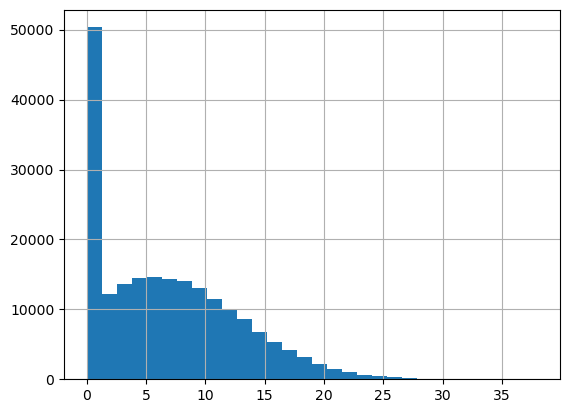

In [3]:
## Task 4. Using the hist() method, display a histogram for the column with call durations.
# Analyze the distribution of the data.

calls['duration'].hist(bins=30)

## Table internet — information about internet sessions:

id — unique session number
mb_used — amount of internet data used during the session (in megabytes)
session_date — date of the internet session
user_id — identifier of the user

In [4]:

## Task 5. Open the file /datasets/internet.csv and save the DataFrame to the variable sessions.
## Task 6. Display the first 5 rows of the DataFrame sessions.
## Task 7. Display the main information for the DataFrame sessions using the info() method.

sessions= pd.read_csv('internet.csv')
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


<Axes: >

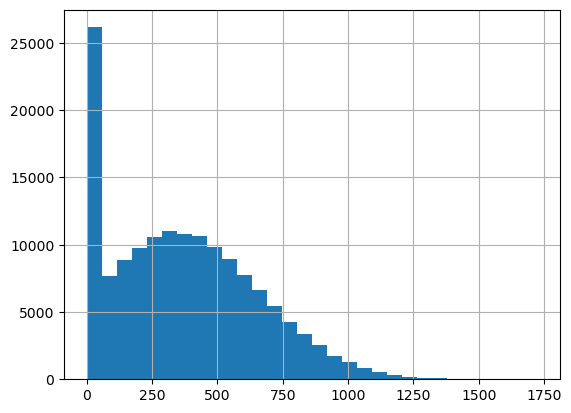

In [6]:
## Task 8. Using the hist() method, display a histogram for the column that shows the amount of data used in megabytes.
sessions['mb_used'].hist(bins=30)


## Table messages — information about messages:

id — unique message number
message_date — date of the message
user_id — identifier of the user who sent the message

In [7]:
## Task 9. Open the file /datasets/messages.csv and save the DataFrame to the variable messages.
## Task 10. Display the first 5 rows of the DataFrame messages.
## Task 11. Display the main information for the DataFrame messages using the info() method.

In [8]:
messages=pd.read_csv('messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


## Table tariffs — information about tariffs:

tariff_name — name of the tariff
rub_monthly_fee — monthly subscription fee in rubles
minutes_included — number of talk minutes per month included in the subscription fee
messages_included — number of messages per month included in the subscription fee
mb_per_month_included — amount of internet data included in the subscription fee (in megabytes)
rub_per_minute — cost of a minute of talk beyond the included package (for example, if the tariff includes 100 minutes of talk per month, a charge is applied starting from the 101st minute)
rub_per_message — cost of sending a message beyond the included package
rub_per_gb — cost of an additional gigabyte of internet traffic beyond the included package (1 gigabyte = 1024 megabytes)


In [10]:
## Task 12. Open the file /datasets/tariffs.csv and save the DataFrame to the variable tariffs.
## Task 13. Display the entire tariffs DataFrame.
## Task 14. Display the main information for the tariffs DataFrame using the info() method.

tariffs=pd.read_csv('tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


## Table users — information about users:

user_id — unique user identifier
first_name — user's first name
last_name — user's last name
age — user's age (years)
reg_date — date of tariff activation (day, month, year)
churn_date — date when the user stopped using the tariff (if missing, the tariff was still active at the time of data extraction)
city — city of residence of the user
tarif — name of the tariff plan

In [12]:

## Task 15. Open the file /datasets/users.csv and save the DataFrame to the variable users.
## Task 16. Display the first 5 rows of the users DataFrame.
## Task 17. Display the main information for the users DataFrame using the info() method.

users= pd.read_csv('users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


# Step 2. Prepare the Data

## Task 18. Convert the columns to a new type using the to_datetime() method.

•	reg_date из таблицы users
•	churn_date из таблицы users
•	call_date из таблицы calls
•	message_date из таблицы messages
•	session_date из таблицы sessions

In [15]:
sessions['session_date'] = pd.to_datetime(sessions['session_date'])
users['churn_date']=pd.to_datetime(users['churn_date'])
users['reg_date']=pd.to_datetime(users['reg_date'])
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date']=pd.to_datetime(messages['message_date'])

## Task 19. In the data, you will find calls with a duration of zero. This is not an error: zeros indicate missed calls, so they do not need to be removed.

However, the values in the duration column of the calls dataframe are fractional. Round up the values in the duration column using the numpy.ceil() method and convert the duration column to the int type.

In [16]:
# import the numpy library
import numpy as np
calls['duration'] = np.ceil(calls['duration'])
print(calls['duration'])

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64


In [17]:
calls['duration'].astype('int')

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int32

## Task 20. Remove the column Unnamed: 0 from the sessions dataframe. A column with this name appears when data is saved with the index specified df.to_csv(..., index=column). This column is not needed right now.

In [18]:
sessions.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)
print(sessions)

              id  mb_used session_date  user_id
0         1000_0   112.95   2018-11-25     1000
1         1000_1  1052.81   2018-09-07     1000
2         1000_2  1197.26   2018-06-25     1000
3         1000_3   550.27   2018-08-22     1000
4         1000_4   302.56   2018-09-24     1000
...          ...      ...          ...      ...
149391  1499_152   318.90   2018-10-03     1499
149392  1499_153   490.13   2018-12-14     1499
149393  1499_154     0.00   2018-10-27     1499
149394  1499_155  1246.32   2018-11-26     1499
149395  1499_156   544.37   2018-10-26     1499

[149396 rows x 4 columns]


## Task 21. Create a column month in the calls dataframe that contains the month number extracted from the call_date column.

## Task 22. Create a column month in the messages dataframe that contains the month number extracted from the message_date column.

## Task 23. Create a column month in the sessions dataframe that contains the month number extracted from the session_date column.

In [19]:
calls['month']=calls['call_date'].dt.month
messages['month']=messages['message_date'].dt.month
sessions['month']=sessions['session_date'].dt.month

In [20]:
print(calls)
print(messages)
print(sessions)

              id  call_date  duration  user_id  month
0         1000_0 2018-07-25       0.0     1000      7
1         1000_1 2018-08-17       0.0     1000      8
2         1000_2 2018-06-11       3.0     1000      6
3         1000_3 2018-09-21      14.0     1000      9
4         1000_4 2018-12-15       6.0     1000     12
...          ...        ...       ...      ...    ...
202602  1499_215 2018-12-26       1.0     1499     12
202603  1499_216 2018-10-18      19.0     1499     10
202604  1499_217 2018-11-10      11.0     1499     11
202605  1499_218 2018-10-06       5.0     1499     10
202606  1499_219 2018-12-14      20.0     1499     12

[202607 rows x 5 columns]
              id message_date  user_id  month
0         1000_0   2018-06-27     1000      6
1         1000_1   2018-10-08     1000     10
2         1000_2   2018-08-04     1000      8
3         1000_3   2018-06-16     1000      6
4         1000_4   2018-12-05     1000     12
...          ...          ...      ...    ...
123

## Task 24. Calculate the number of calls made by each user per month and save it to the variable calls_per_month. To do this, you need to:

Group the dataframe with call information by two columns — user identifiers and month numbers;
Then apply a method to count the number of calls: .agg({'duration': 'count'}).
Display the first 30 lines of calls_per]].

Table calls — information about calls:

id — unique call number
call_date — date of the call
duration — duration of the call in minutes
user_id — identifier of the user who made the call
month - month from the call date


In [21]:
calls_per_month=calls.groupby(['user_id','month']).agg(calls=('duration', 'count')) 

In [22]:
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

## Task 25. Calculate the total number of minutes spoken by each user per month and save it to the variable minutes_per_month. To do this, you need to:

Group the dataframe with call information by two columns — user identifiers and month numbers;
Then apply a method to calculate the sum: .agg(minutes=('duration', 'sum')); this will rename the column to minutes after calculating the sum.
Display the first 30 lines of minutes_per_month.

In [23]:
minutes_per_month=calls.groupby(['user_id','month']).agg(minutes=('duration', 'sum'))
print(minutes_per_month.head(30))

               minutes
user_id month         
1000    5        159.0
        6        172.0
        7        340.0
        8        408.0
        9        466.0
        10       350.0
        11       338.0
        12       333.0
1001    11       430.0
        12       414.0
1002    6        117.0
        7        214.0
        8        289.0
        9        206.0
        10       212.0
        11       243.0
        12       236.0
1003    8        380.0
        9        961.0
        10       855.0
        11       824.0
        12       802.0
1004    5         35.0
        6        171.0
        7        135.0
        8        137.0
        9        117.0
        10       145.0
        11       117.0
        12       130.0


## Task 26. Calculate the number of messages sent by each user per month and save it to the variable messages_per_month. To do this, you need to:

Group the dataframe with message information by two columns — user identifiers and month numbers;
Then apply a method to count the number of messages: .agg(messages=('message_date', 'count')), which will rename the column to messages after calculating the count.
Display the first 30 lines of messages_per_month.

Table messages — information about messages:

id — unique message number
message_date — date of the message
user_id — identifier of the user who sent the message


In [24]:
messages_per_month=messages.groupby(['user_id','month']).agg(messages=('message_date', 'count'))
print(messages_per_month.head(30))

               messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38


## Task 27. Calculate the total amount of megabytes used by each user per month and save it to the variable sessions_per_month. To do this, you need to:

Group the dataframe with internet session information by two columns — user identifiers and month numbers;
Then apply a method to calculate the total: .agg({'mb_used': 'sum'}).

Table internet — information about internet sessions:

id — unique session number
mb_used — amount of internet data used during the session (in megabytes)
session_date — date of the internet session
user_id — identifier of the user

In [25]:
sessions_per_month=sessions.groupby(['user_id','month']).agg({'mb_used': 'sum'})
print(sessions_per_month.head(30))

                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04


# Step 3. Data Analysis

Exploratory data analysis and calculation of monthly revenue are already included in the project.

Monthly revenue is calculated as follows:

Subtract the free limit from the total amount of calls, messages, and internet traffic;
Multiply the remainder by the value from the tariff plan;
Add the subscription fee corresponding to the tariff plan to the result.
Run the cells of this step, study the code and the result. What conclusions can be drawn from the results of this stage?


Combine all the values calculated above into a single DataFrame called user_behavior.
For each "user — month" pair, information will be available on the tariff, number of calls, messages, and megabytes used.

In [26]:
users['churn_date']

0            NaT
1            NaT
2            NaT
3            NaT
4            NaT
         ...    
495          NaT
496          NaT
497          NaT
498   2018-10-25
499          NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]

In [27]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

7.6% of the clients from the dataset have terminated their contracts.

In [28]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Check for missing values in the 'user_behavior table' after merging:

In [29]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Fill in the gaps that have appeared in the data:

In [30]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Join the information about tariffs.

In [31]:
# Rename the column tariff_name to the simpler tariff.

tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [32]:
user_behavior = user_behavior.merge(tariffs, on='tariff')
user_behavior.head(5)

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Calculate the number of minutes, messages, and megabytes that exceed the amounts included in the tariff.


In [33]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Convert the excess megabytes over the tariff limit into gigabytes and save them in the column 'paid_gb'.

In [34]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Calculate the revenue from talk minutes, messages, and internet usage.

In [35]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Calculate the monthly revenue from each user, which will be stored in a column `total_cost`

In [36]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

The DataFrame 'stats_df' will store the main characteristics for each "month — tariff" pair.

In [37]:
# Saving statistical metrics for each "month-tariff" pair in a single table stats_df (mean value, standard deviation, median):

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],
            values=['calls', 'minutes', 'messages', 'mb_used'],
            aggfunc=['mean', 'std', 'median']
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Distribution of the average number of calls by tariff types and months:

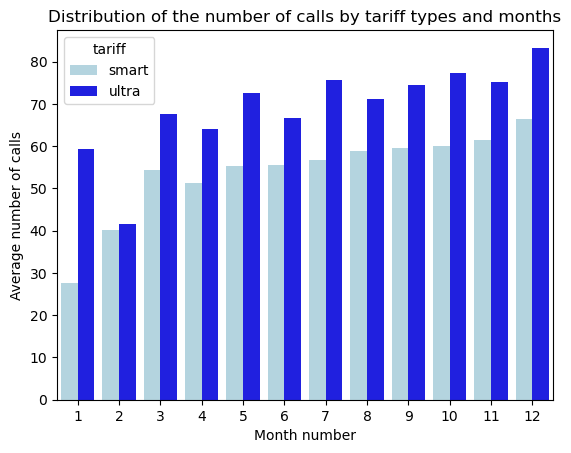

In [38]:
import seaborn as sns

ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the number of calls by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of calls');

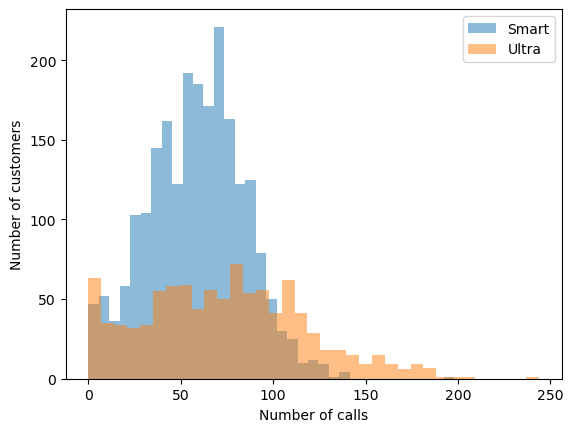

In [39]:
import matplotlib.pyplot as plt

user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls')
plt.ylabel('Number of customers')
plt.show()

Distribution of the average call duration by tariff types and months

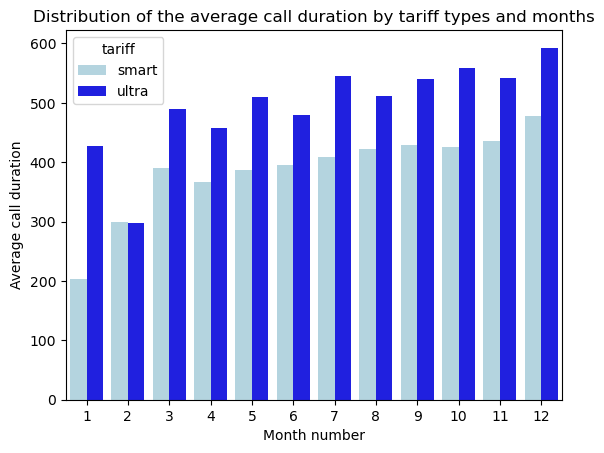

In [40]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the average call duration by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average call duration');

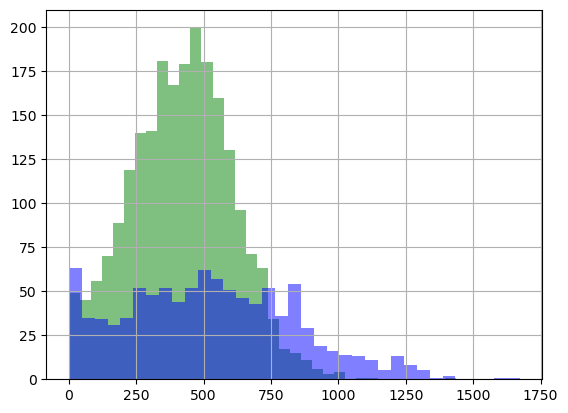

In [41]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

The average call duration for Ultra tariff subscribers is higher than that for Smart tariff subscribers. Throughout the year, users of both tariffs increase the average duration of their calls. The growth in average call duration for Smart tariff subscribers is consistent throughout the year. Ultra tariff users do not show similar linear stability. It is worth noting that in February, both tariff plans observed the lowest figures.

Distribution of the average number of messages by tariff types and months

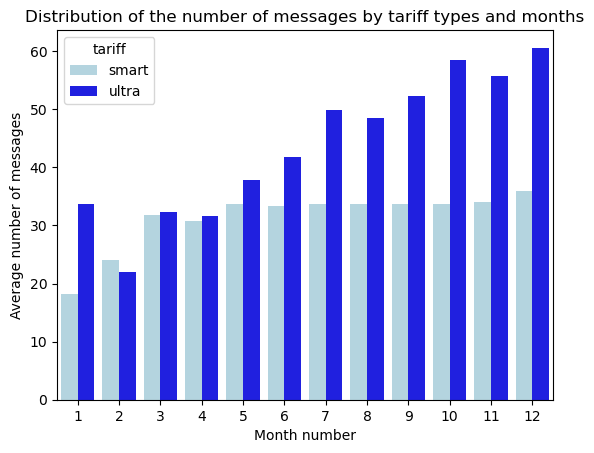

In [42]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the number of messages by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of messages');

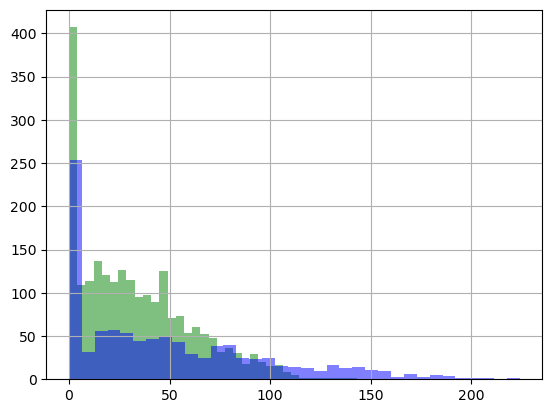

In [43]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

On average, Ultra tariff users send more messages—almost 20 messages more than Smart tariff users. The number of messages increases throughout the year for both tariffs. The dynamics of message sending are similar to the trends in call duration: February recorded the lowest number of messages for the year, and Ultra tariff users also show a nonlinear positive trend.

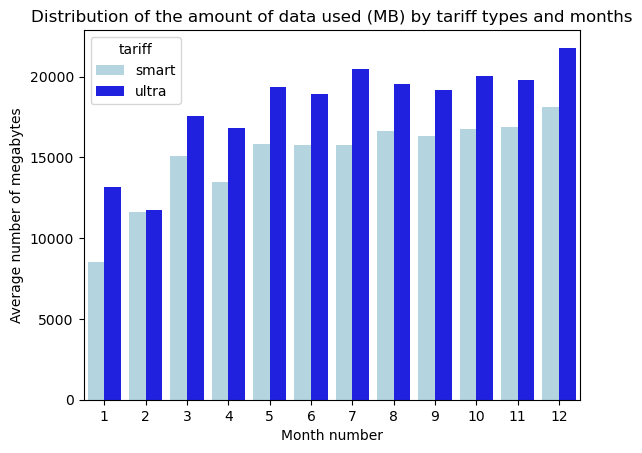

In [44]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the amount of data used (MB) by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of megabytes');

Comparison of data usage in megabytes among Smart and Ultra tariff users

In [45]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used']

985     18429.34
986     14036.66
987     10856.82
988     17580.10
989     20319.26
          ...   
3209    20579.36
3210     1845.75
3211    17788.51
3212    17963.31
3213    13055.58
Name: mb_used, Length: 2229, dtype: float64

In [46]:
user_behavior[user_behavior['tariff'] =='ultra']['messages']

0      22.0
1      60.0
2      75.0
3      81.0
4      57.0
       ... 
980    13.0
981    82.0
982    82.0
983    79.0
984    84.0
Name: messages, Length: 985, dtype: float64

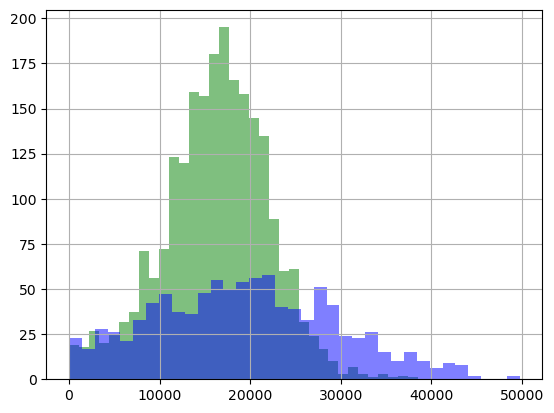

In [47]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

Users utilized the internet the least in January, February, and April. Smart tariff users most frequently consume 15–17 GB, while Ultra tariff plan subscribers typically use 19–21 GB.

# Step 4. Test Hypotheses

Test two hypotheses about user revenue. Use an alpha level of 0.05 (5%).

Task 28

Test the hypothesis that the average revenue from "Ultra" and "Smart" tariff users is different. Use a method from the scipy library and display the p-value: only the value, without rounding or explanations.
Then, display the phrase "Reject the null hypothesis" if there are grounds to reject the null hypothesis, or "Failed to reject the null hypothesis" if there are no grounds to reject the null hypothesis. An if statement and comparison of the resulting p-value with the specified significance level will help you here.

**Task 28.** Hypothesis Testing: The average revenue of users on the "Ultra" and "Smart" tariffs is different

```
H_0: The revenue (total_cost) of "Ultra" users is equal to the revenue (total_cost) of "Smart" users.
H_a: The revenue (total_cost) of "Ultra" users is not equal to the revenue (total_cost) of "Smart" users.
alpha = 0.05
```

In [48]:
display(user_behavior)

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,paid_minutes,paid_messages,paid_mb,paid_gb,cost_minutes,cost_messages,cost_gb,total_cost
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,42.0,20579.36,247.0,68,2018-10-25,Владикавказ,Всеволод,...,3,3,0.0,0.0,5219.36,6,0.0,0.0,1200,1750.0
3210,1499,9,9.0,11.0,1845.75,70.0,35,NaT,Пермь,Гектор,...,3,3,0.0,0.0,0.00,0,0.0,0.0,0,550.0
3211,1499,10,68.0,48.0,17788.51,449.0,35,NaT,Пермь,Гектор,...,3,3,0.0,0.0,2428.51,3,0.0,0.0,600,1150.0
3212,1499,11,74.0,59.0,17963.31,612.0,35,NaT,Пермь,Гектор,...,3,3,112.0,9.0,2603.31,3,336.0,27.0,600,1513.0


In [49]:
from scipy import stats as st

In [50]:
# results = Call the method to test the hypothesis

sample_1 = user_behavior[user_behavior['tariff'] =='smart']['total_cost']

sample_2 = user_behavior[user_behavior['tariff'] =='ultra']['total_cost']


alpha = 0.05   # alpha = задайте значение уровня значимости

results = st.ttest_ind(sample_1, sample_2, equal_var = False )


print('p-value:', results.pvalue)

# conditional operator with output string containing the answer

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 


p-value: 4.2606313931076085e-250
Reject the null hypothesis


**Task 29.** Hypothesis Testing: The average revenue from users in Moscow differs from the revenue from users in other regions.

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [52]:
# results = Call the method to test the hypothesis

sample_1 = user_behavior[user_behavior['city'] =='Москва']['total_cost']

sample_2 = user_behavior[user_behavior['city'] !='Москва']['total_cost']


alpha = 0.05   # alpha = задайте значение уровня значимости

results = st.ttest_ind(sample_1, sample_2, equal_var = False )


print('p-value:', results.pvalue)

# conditional operator with output string containing the answer

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value: 0.5257376663729298
Failed to reject the null hypothesis
